<class 'pandas.core.frame.DataFrame'>
Index: 7009 entries, 0 to 6762
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   KielerWoche                        7009 non-null   int64
 1   gefühl_Kalt                        7009 non-null   int64
 2   gefühl_Mild                        7009 non-null   int64
 3   gefühl_Warm                        7009 non-null   int64
 4   Feiertag                           7009 non-null   int64
 5   KielLauf                           7009 non-null   int64
 6   Kieler_Triathlon                   7009 non-null   int64
 7   Fußball                            7009 non-null   int64
 8   PaycheckEffect                     7009 non-null   int64
 9   Sensitivity_High                   7009 non-null   int64
 10  Sensitivity_Moderate               7009 non-null   int64
 11  Wind_Nicht windig                  7009 non-null   int64
 12  Wind_Sehr windig         

c:\Users\lorda\Desktop\AI_ML\bakery_prediction_data_science_and_ml\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 57424.8789 - mae: 198.8879 - val_loss: 45907.6797 - val_mae: 182.4050
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47180.9531 - mae: 188.3492 - val_loss: 35439.6445 - val_mae: 168.1730
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33895.1250 - mae: 162.4856 - val_loss: 26662.6992 - val_mae: 151.6792
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21860.0410 - mae: 130.1916 - val_loss: 15278.8428 - val_mae: 112.4322
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12923.4844 - mae: 95.3963 - val_loss: 7879.0293 - val_mae: 73.2953
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10460.9404 - mae: 70.8234 - val_loss: 4719.6357 - val_mae: 48.7804
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6599.6831 - mae: 51.9338 - val_loss: 3314.9290 - val_mae: 37.2400
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4191.6992 - mae: 44.9200 - val_loss: 3861.20

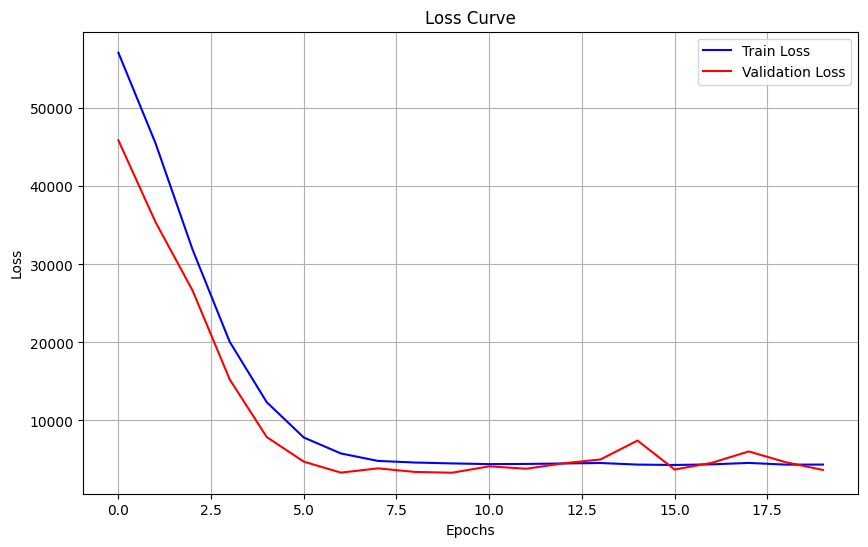

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
Train R²: 0.8095
Validation R²: 0.7912
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
   Umsatz_Vorhersage
0         132.177872
1         132.221786
2         132.221786
3          87.422661
4         140.497894


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import r2_score

# Daten laden
data_train = "../0_DataPreparation/final_data_train.csv"
df_train = pd.read_csv(data_train)

data_test = "../0_DataPreparation/final_data_test.csv"
df_test = pd.read_csv(data_test)

# Umwandeln der Datumsspalte in ein Datetime-Format
df_train['Datum'] = pd.to_datetime(df_train['Datum'])

# Datensatz nach Datum und Warengruppe sortieren
df_train_sorted = df_train.sort_values(by=['Datum', 'Warengruppe'])

# Features und Ziel definieren
feature_to_drop = ['id', 'Umsatz', 'Datum', 'Warengruppe', 'Bewoelkung', 'Temperatur',
                   'Windgeschwindigkeit', 'Wettercode', 'Wochentag',
                   'Monat', 'Jahr', 'Jahreszeit', 'Gefühl', 'InflationSensitivity', 'Windkategorie',  
                   'Tag_Kategorie', 'Inflation_Kategorisierung',
                   'Montag', 'Dienstag', 'Mittwoch',
                   'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
feature_to_drop2 = ['id', 'Datum', 'Warengruppe', 'Bewoelkung', 'Temperatur',
                   'Windgeschwindigkeit', 'Wettercode', 'Wochentag',
                   'Monat', 'Jahr', 'Jahreszeit', 'Gefühl', 'InflationSensitivity', 'Windkategorie',  
                   'Tag_Kategorie', 'Inflation_Kategorisierung',
                   'Montag', 'Dienstag', 'Mittwoch',
                   'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']

# Datenaufteilung in X (Features) und y (Target)
X = df_train_sorted.drop(columns=feature_to_drop)  # Entfernen der spezifischen Spalten
y = df_train_sorted['Umsatz']  # Ziel: Umsatz

df_test = df_test.drop(columns=feature_to_drop2)
print(X.info())

# Skalierung der Daten
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Aufteilen in Training (80%) und Validierung (20%) ohne Zufall (shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Eingabedimension
input_dim = X_train.shape[1]

# Regularisierung Faktor
regularization_factor = 0.01

# Modell definieren
model = Sequential()

# Input Layer und Hidden Layer 1 mit L2 Regularisierung
model.add(Dense(128, input_dim=input_dim, activation='relu',
                kernel_regularizer=regularizers.l2(regularization_factor)))  # L2 Regularisierung

# Hidden Layer 2 mit L2 Regularisierung
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l2(regularization_factor)))  # L2 Regularisierung
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Hidden Layer 3 mit L2 Regularisierung
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(regularization_factor)))  # L2 Regularisierung
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(1, activation='linear'))

# Modell kompilieren
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping]
)

# Loss-Kurve plotten
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Vorhersagen für die Trainings- und Validierungsdaten erstellen
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Berechnung des R²-Werts für Trainings- und Validierungsdaten
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Train R²: {train_r2:.4f}")
print(f"Validation R²: {val_r2:.4f}")

# Vorhersagen für df_test erstellen (ohne tatsächliche Umsatzwerte)
X_test_scaled = scaler.transform(df_test)  # Testdaten skalieren, wie es mit den Trainingsdaten gemacht wurde
y_pred = model.predict(X_test_scaled)

# Neue Spalte in df_test mit den Vorhersagen (Umsatz)
df_test['Umsatz_Vorhersage'] = y_pred

# Ausgabe der ersten Zeilen von df_test, um die Vorhersagen zu überprüfen
print(df_test[['Umsatz_Vorhersage']].head())

# Optional: Speichern des df_test mit den Vorhersagen
df_test.to_csv("../0_DataPreparation/final_data_test_with_predictions.csv", index=False)

